<a href="https://colab.research.google.com/github/Garv004760/linreg/blob/main/AQI_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
file_path = "/content/drive/My Drive/AQI_Data.csv"
df = pd.read_csv(file_path)

In [4]:
print("Column Names:", df.columns)
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDataset Summary:")
print(df.describe())

Column Names: Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')
      T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: floa

In [5]:
df.columns = df.columns.str.strip()
print("Updated Column Names:", df.columns)


Updated Column Names: Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')


In [6]:
df = df.dropna()
print(f"Dataset size after cleaning: {df.shape}")


Dataset size after cleaning: (1092, 9)


In [25]:
correlation = df.corr()
print(correlation["PM 2.5"].sort_values(ascending=False))
selected_features = ["T", "H", "VV", "V", "VM"]
target = "PM 2.5"
X = df[selected_features]  # Features
y = df[target]  # Target

print(f"Selected Features: {selected_features}")


PM 2.5    1.000000
SLP       0.623187
H         0.138005
VM       -0.215854
V        -0.268530
TM       -0.568409
VV       -0.573941
T        -0.631462
Tm       -0.673824
Name: PM 2.5, dtype: float64
Selected Features: ['T', 'H', 'VV', 'V', 'VM']


In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Test Data: {X_test.shape}")


Training Data: (873, 5), Test Data: (219, 5)


In [27]:
poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = Ridge(alpha=1.0)
poly_model.fit(X_poly_train, y_train)

# Predictions
y_pred_poly = poly_model.predict(X_poly_test)


r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression (Degree=4) R² Score: {r2_poly:.2f}")


Polynomial Regression (Degree=4) R² Score: 0.41


In [28]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
print(f"Optimized Random Forest R² Score: {r2_rf:.2f}")


Optimized Random Forest R² Score: 0.73


In [31]:
xgb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"Gradient Boosting (XGBoost) R² Score: {r2_xgb:.2f}")

Gradient Boosting (XGBoost) R² Score: 0.77


In [32]:
print("Model Performance Comparison:")
print(f"Polynomial Regression (Degree=4) R² Score: {r2_poly:.2f}")
print(f"Optimized Random Forest R² Score: {r2_rf:.2f}")
print(f"Gradient Boosting (XGBoost) R² Score: {r2_xgb:.2f}")


Model Performance Comparison:
Polynomial Regression (Degree=4) R² Score: 0.41
Optimized Random Forest R² Score: 0.73
Gradient Boosting (XGBoost) R² Score: 0.77


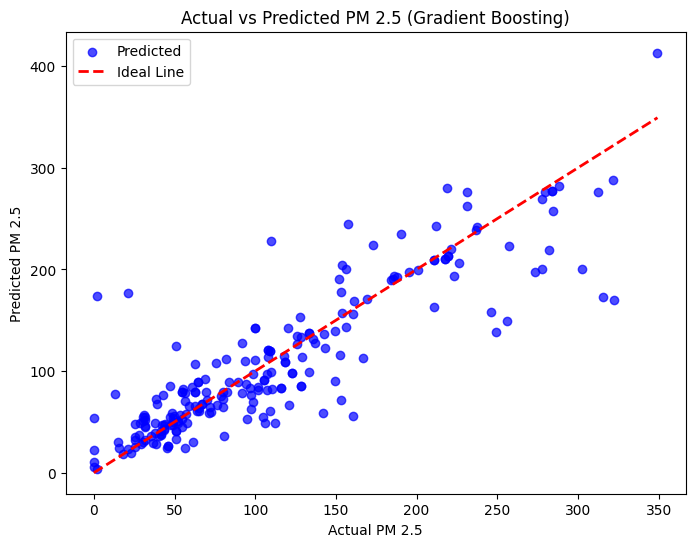

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color="blue", label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", linewidth=2, label="Ideal Line")
plt.xlabel("Actual PM 2.5")
plt.ylabel("Predicted PM 2.5")
plt.title("Actual vs Predicted PM 2.5 (Gradient Boosting)")
plt.legend()
plt.show()
